In [1]:
# Imports for the Perlin noise implementation
import numpy as np
import matplotlib.pyplot as plot

# Perlin Noise (Implementation and Description)
##### Author: Deyan Sirakov *(17 year old nerd, with a lot of free time on his hands)*

### 1. What is Perlin Noise?
So, what is Perlin Noise? If you hear this term for the first time in your life, it may sound really complicated, but believe me, it's really just some high school math and a lot of creativity. The Perlin Noise is just a gradient noise, which looks way more natural than the [https://en.wikipedia.org/wiki/White_noise](white noise) we see sometimes for example when the connection between the TV and the reciever is bad. The Perlin Noise was developed by [https://en.wikipedia.org/wiki/Ken_Perlin](Ken Perlin in) 1983 (way older than minecraft). He created it as a result of a frustration with the "machine-like" look of the CGI by that time. Perlin developed it after working on Disney's [https://en.wikipedia.org/wiki/Tron](Tron (1982)). 

###### Resources:
 Most of the information is found in the [https://en.wikipedia.org/wiki/Perlin_noise](wikipedia page)

### 2. Explanation of the implementation
Let's simply explore the algorithm in more detail

### 3. Implementation
#### (The long awaited part)

In [5]:
# Function to create the linear interpolation (dot product)
def lerp(a, b, x):
    return a + x * (b - a)

In [7]:
# Smoothing function
def fade(f):
    return 6 * f**5 - 15 * f**4 + 10 * f**3

In [9]:
# Calculate the gradient vectors and the dot product
def gradient(c, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y

In [10]:
# Create evenly spaced out numbers in a specified interval
lin_array = np.linspace(1, 10, 500, endpoint=False)

# Create a grid using linear 1D arrays
x, y = np.meshgrid(lin_array, lin_array)

In [15]:
# Create a permutation table, based on the number of pixels
def p_noise(x, y, seed=0):
    np.random.seed(seed) # Seed is the initial value we want to start with. This helps to keep the perlin graph smooth
    ptable = np.arange(256, dtype=int)
    
    # Shuffle our numbers in the table
    np.random.shuffle(ptable)
    
    # Create a 2D array and turn it one dimensional, so that we can apply our dot product interpolations easily
    ptable = np.stack([ptable, ptable]).flatten()
    
    # Grid coordinates
    xi, yi = x.astype(int), y.astype(int)
    
    # Distance the vector coordinates
    xg, yg = x - xi, y - yi
    
    # Apply the fade function to distance the coordinates
    xf, yf = fade(xg), fade(yg)
    
    # The gradient vector coordinates in the top left, top right, bottom left and bottom right
    n00 = gradient(ptable[ptable[xi] + yi], xg, yg)
    n01 = gradient(ptable[ptable[xi] + yi + 1], xg, yg - 1)
    n11 = gradient(ptable[ptable[xi + 1] + yi + 1], xg - 1, yg - 1)
    n10 = gradient(ptable[ptable[xi + 1] + yi], xg - 1, yg)
    
    # Apply the linear interpolation 
    x1 = lerp(n00, n10, xf)
    x2 = lerp(n01, n11, xf)
    return lerp(x1, x2, yf)

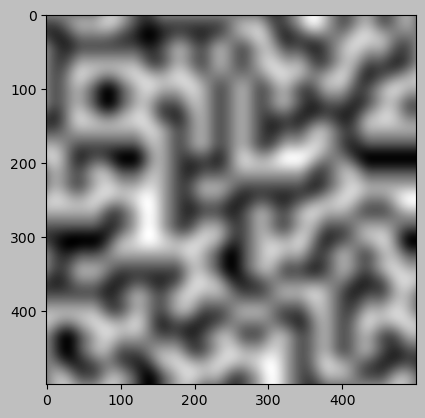

In [24]:
# Generate the graph
plot.imshow(p_noise(x, y, seed=1), origin='upper')
plot.show()